In [1]:
import re
import gc
import numpy  as np
import pandas as pd

import wordcloud as wc
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Read and preview data
cyberbullying_df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv')
print('There are {} rows and {} columns'.format(cyberbullying_df.shape[0],cyberbullying_df.shape[1]))
cyberbullying_df.sample(5)

There are 47692 rows and 2 columns


,tweet_text,cyberbullying_type
46809,"RACISM is wen u select ur white clothes,n wash...",ethnicity
9968,are u slow i said when they let us as in FEMAL...,gender
18554,That's what these idiots have been programmed ...,religion
19981,@MeFixerr we know you are a patriotic Pakistan...,religion
33838,The marriage of being bullied in middle/high s...,age


In [3]:
# Viz: label distribution
fig = px.bar(cyberbullying_df.groupby('cyberbullying_type').agg('count').reset_index().rename({'tweet_text':'count'},axis=1).sort_values('count', ascending = False),
             x = 'cyberbullying_type',
             y = 'count',
             color = 'cyberbullying_type',
             opacity = 0.7,
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Label Distribution',
            )

fig.show()

In [4]:
def average_word_length(text):
    words = text.split()
    word_count = len(words)
    word_length = 0
    for word in words:
        word_length += len(word)
    avg_word_length = round(word_length / word_count,2)
    return avg_word_length


cyberbullying_df['tweet_length'] = cyberbullying_df['tweet_text'].apply(lambda x: len(x.split()))
cyberbullying_df['average_word_length'] = cyberbullying_df['tweet_text'].apply(average_word_length)

In [5]:
fig = px.box(cyberbullying_df,
             x = 'cyberbullying_type',
             y = 'tweet_length',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Tweet Lengths per class'
)


fig.update_yaxes(range = [0,80])
fig.show()

In [6]:
# Viz: Word lengths per class
fig = px.box(cyberbullying_df,
             x = 'cyberbullying_type',
             y = 'average_word_length',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Words Lengths per class'
)


fig.update_yaxes(range=[0,20])
fig.show()

In [7]:
# Viz: Lexical Uniqueness
def unique_word_share(text):
    words = text.split()
    word_count = len(words)
    unique_word_count = len(set([w.lower() for w in words]))
    word_uniqueness = round(unique_word_count * 100/word_count,2)
    return word_uniqueness

cyberbullying_df['lexical_uniqueness'] = cyberbullying_df['tweet_text'].apply(unique_word_share)

In [8]:
fig = px.box(cyberbullying_df,
             y = 'cyberbullying_type',
             x = 'lexical_uniqueness',
             color = 'cyberbullying_type',
             color_discrete_sequence = px.colors.diverging.curl,
             template = 'plotly_dark',
             title = 'Boxplot of Lexical Uniqueness per class'
)


fig.show()

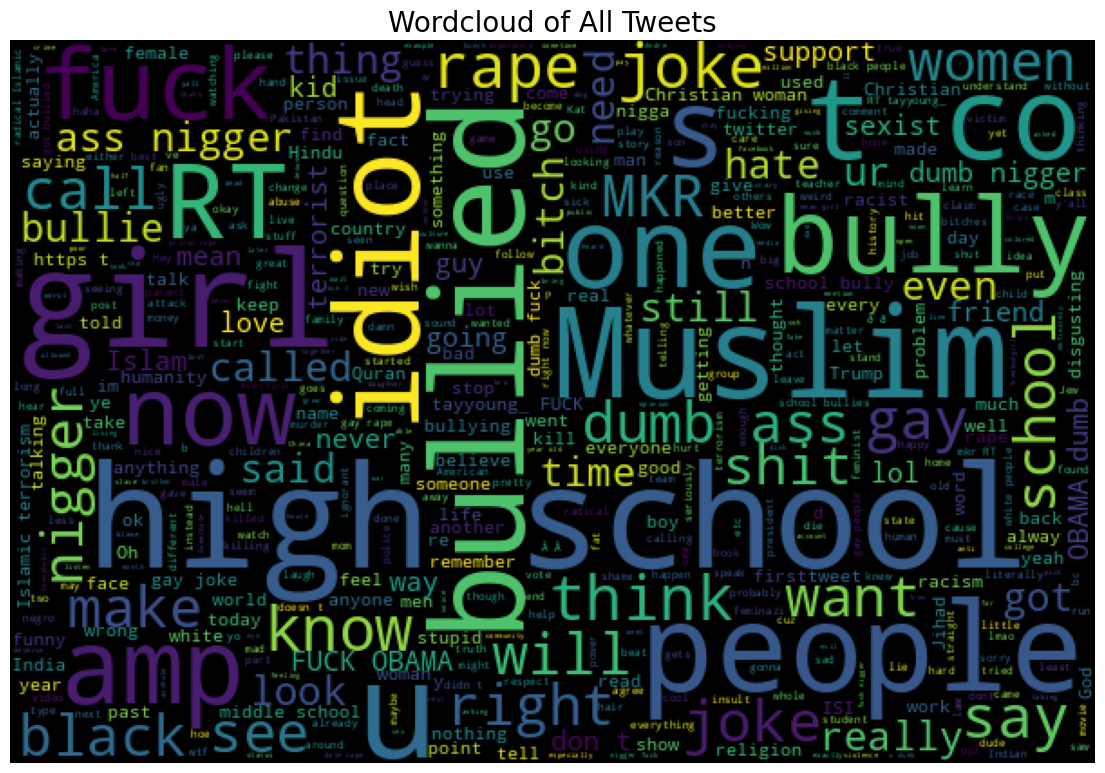

In [9]:
# Wordcloud of all Tweets
wordcloud = wc.WordCloud(stopwords = wc.STOPWORDS,
                         max_font_size = 80,
                         max_words = 5000,
                         width = 600,
                         height = 400,
                         background_color = 'black').generate(' '.join(txt for txt in cyberbullying_df["tweet_text"]))


fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title('Wordcloud of All Tweets', size = 20)
plt.imshow(wordcloud);

In [10]:
fig = px.histogram(cyberbullying_df,
                   x = 'tweet_length',
                   template = 'plotly_dark',
                   title = 'Distribution of Tweet Length',
                   color_discrete_sequence = ['#3ac2f9'],
                   opacity = 0.7,
                  )

fig.show()